Pada proyek kali ini kita akan melakukan klasifikasi Machine Learning dan Visualisasi Data menggunakan dataset iris, yang merupakan salah satu dataset populer untuk belajar Machine Learning. Proyek ini menerapkan model machine learning Random Forest. Model machine learning akan dilatih dengan data latih (training data) dan akan diuji dengan data uji. Dalam kasus ini kita membagi data train sebanyak 70% dan data uji sebanyak 30%. Kemudian kita dapat mengevaluasi performa model yang telah dilatih dengan menghitung akurasi model tersebut dan melakukan visualisasi model yang digunakan. Sehingga kita dapat melakukan prediksi spesies dari sebuah bunga iris dengan memasukkan data baru sesuai dengan atribut dataset.

## Import library

Pertama kita akan mengimport library yang akan digunakan dalam proyek kali ini.

In [68]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

Setelah itu mempersiapkan dataset serta mengubah dataset ke dalam dataframe dan menanmpilkan 5 baris pertama data.

In [69]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dari data diatas terdapat kolom 'Id', karena kolom 'Id' tidak kita gunakan maka kita hapus kolom tersebut. Untuk menghilangkan kolom tersebut, gunakan fungsi drop().

In [70]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Cek nilai null pada dataset dengan menggunakan isnull().sum()

In [71]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Fungsi ini berguna ketika kita ingin mengecek apakah terdapat nilai null di dalam dataframe, atau mengetahui di kolom mana saja terdapat nilai null yang perlu diisi. Selain itu, fungsi ini juga berguna untuk menyiapkan data sebelum dilakukan analisis, karena nilai null dapat mengganggu kinerja algoritma machine learning. Dari output yang diberikan terlihat tidak ada nilai null pada setiap kolom.

## EDA (Exploratory Data Analysis)

Tampilkan statistika deskriptif dari dataset menggunakan fungsi describe().

In [72]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Fungsi describe() berguna untuk mengetahui distribusi data di dalam dataframe, terutama ketika kita ingin mengetahui nilai rata-rata, standar deviasi, dan nilai-nilai ekstrem dari setiap kolom. Selain itu, fungsi ini juga berguna untuk mengecek apakah terdapat outlier (nilai yang jauh dari nilai rata-rata) di dalam dataframe, karena output akan menunjukkan nilai minimum dan maximum dari setiap kolom.

Untuk melihat informasi mengenai data, kita dapat menggunakan fungsi info().

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Output tersebut menunjukkan bahwa dataframe df terdiri dari 150 baris data dan 5 kolom, dengan nama kolom SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, dan Species. Selain itu, tipe data dari setiap kolom juga ditampilkan, dengan float64 untuk kolom SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, dan object untuk kolom Species. Jumlah memori yang digunakan oleh dataframe juga ditampilkan di bagian akhir output. 

Selain itu, fungsi ini juga berguna untuk mengecek apakah terdapat kolom yang memiliki nilai null (tidak terisi), karena output akan menunjukkan jumlah baris data di setiap kolom dan jumlah baris data yang tidak terisi di setiap kolom.

In [74]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Baris kode df['Species'].value_counts() merupakan syntax yang digunakan untuk menghitung frekuensi kemunculan setiap nilai dari sebuah kolom (atribut) di dalam dataframe. Dalam kasus ini, kolom yang diproses adalah kolom Species di dalam dataframe df. Output tersebut menunjukkan bahwa di dalam dataframe df, terdapat 50 kemunculan dari nilai Iris-setosa, 50 kemunculan dari nilai Iris-versicolor, dan 50 kemunculan dari nilai Iris-virginica.

### Data Visualization

#### Histogram

<AxesSubplot: >

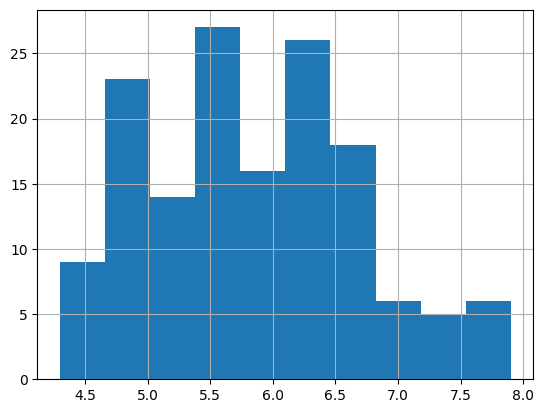

In [75]:
df['SepalLengthCm'].hist()

<AxesSubplot: >

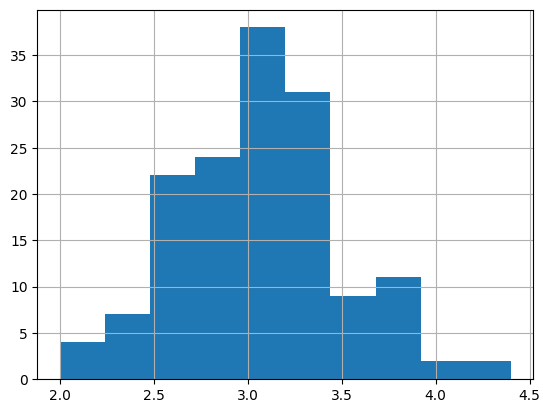

In [76]:
df['SepalWidthCm'].hist()

<AxesSubplot: >

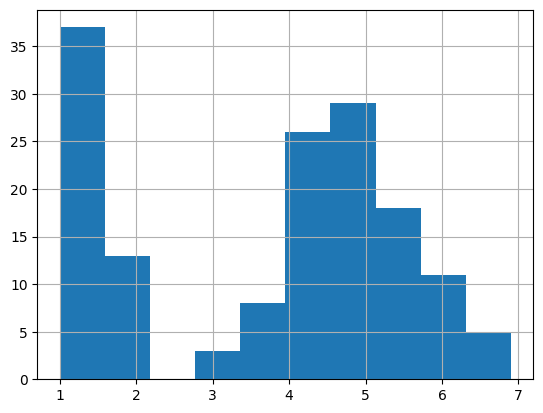

In [77]:
df['PetalLengthCm'].hist()

<AxesSubplot: >

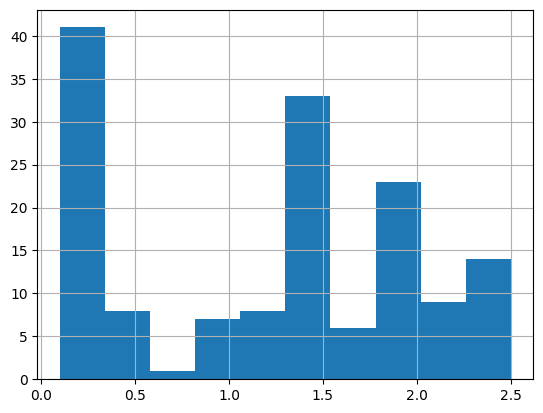

In [78]:
df['PetalWidthCm'].hist()

#### scatterplot

In [79]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

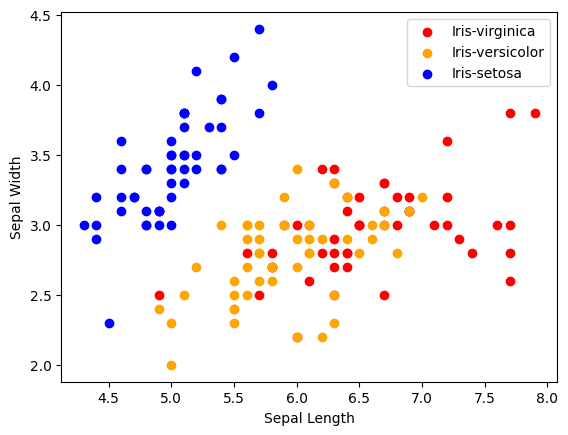

In [80]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

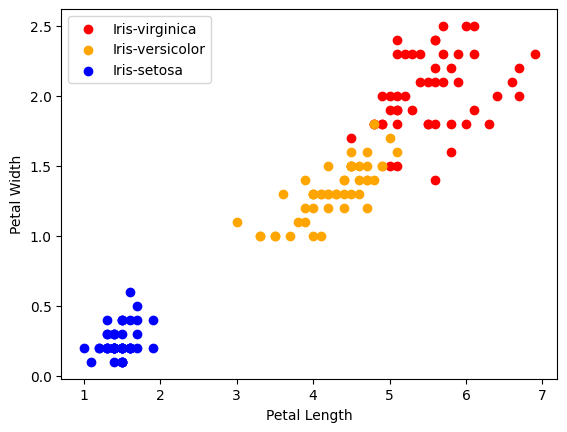

In [81]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

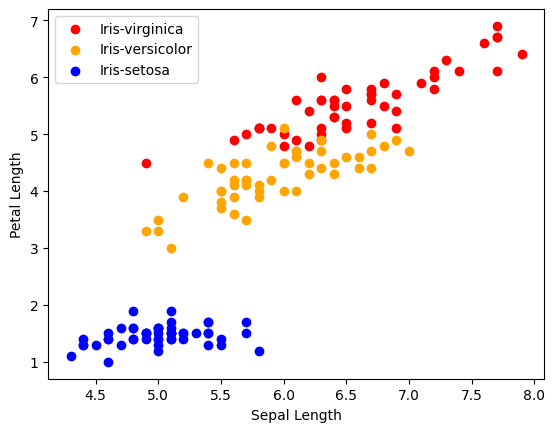

In [82]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

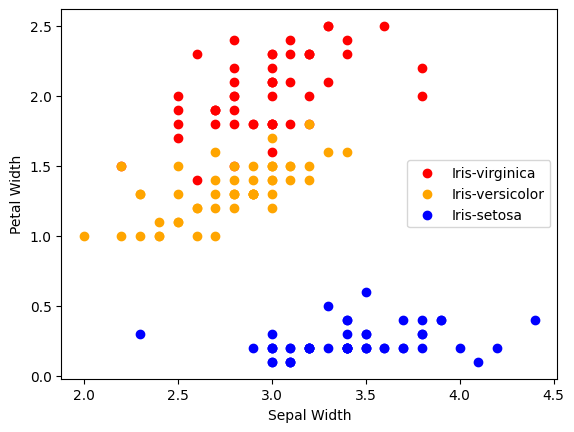

In [83]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

#### Coorelation Matrix

Matriks korelasi adalah sebuah tabel yang menunjukkan koefisien korelasi antara variabel. Setiap sel di dalam tabel menunjukkan korelasi antara dua variabel. Nilainya berada di rentang -1 hingga 1, dimana nilai -1 menunjukan korelasi negatif yang kuat, nilai 0 menunjukan tidak ada korelasi, dan nilai 1 menunjukan korelasi positif yang kuat. Korelasi negatif mengartikan jika suatu variabel nilainya semakin besar maka variabel lain nilainya semakin kecil (bertentangan). Sementara itu korelasi positif mengartikan ketika suatu variabel nilainya semakin besar variabel lainnya juga semakin besar nilainya.

In [84]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

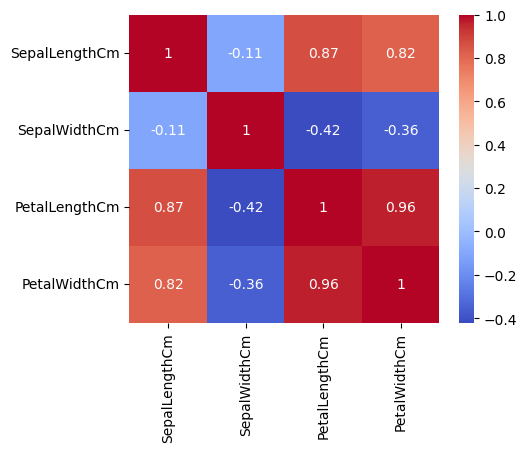

In [85]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Dari heatmap tersebut terlihat bahwa kolom PetalLengthCm dan PetalWidthCm memiliki korelasi yang tinggi sebesar 0.96.

## Data Processing

### Label Encoder

Dalam machine learning, kita biasanya berurusan dengan dataset yang berisi label ganda di satu atau lebih kolom. Label ini dapat berupa kata-kata atau angka. Label encoding merujuk pada konversi label ke bentuk numerik agar dapat dikonversi ke bentuk yang dapat dibaca oleh komputer.

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
le.transform(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

array([0, 1, 2])

Dari hasil tersebut maka label pada kolom species sudah terkonvesrsi menjadi numerik berupa angka 0, 1, dan 2 sebagai kelas data

## Model Training

In [89]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

Baris kode from sklearn.model_selection import train_test_split merupakan statement import yang digunakan untuk mengimpor fungsi train_test_split dari modul model_selection di dalam library scikit-learn (sklearn). Fungsi train_test_split ini digunakan untuk membagi dataset menjadi dua bagian, yaitu bagian untuk data training dan bagian untuk data testing.

Dalam kasus ini kita membagi data train sebanyak 70% dan data test sebanyak 30%. Data train digunakan untuk melatih model dan data test digunaka untuk menguji model.

### Random Forest

Random forest adalah jenis model machine learning yang populer digunakan dalam klasifikasi dan regresi, menggunakan metode ensemble yang artinya terdiri dari beberapa model kecil yang bekerja bersama-sama untuk memprediksi sesuatu. Setiap pohon keputusan (descision tree) diprediksi secara terpisah dan kemudian digabungkan menjadi satu prediksi akhir untuk membuat model hutan acak (random forest).

Pertama, mengimport kelas RandomForestClassifier dari modul ensemble di library sklearn

In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

 Kedua, melatih model machine learning dengan menggunakan data latih (training data)

In [99]:
model.fit(x_train, y_train)

RandomForestClassifier()

Perintah model.fit(x_train, y_train) akan mengoptimalkan parameter-parameter model dengan menggunakan data latih yang diberikan. Di sini, model adalah objek kelas model yang telah dibuat sebelumnya yaitu LogisticRegression, x_train adalah variabel yang berisi fitur-fitur (variabel-variabel prediktor) dari data latih, dan y_train adalah variabel yang berisi kelas dari data latih.

Selanjutnya, kita dapat mengevaluasi performa model yang telah kita latih dengan menghitung akurasi model.

In [100]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


### Random Forest Visualization

Berikut contoh visualisasi 3 Pohon Keputusan yang digunakan oleh model

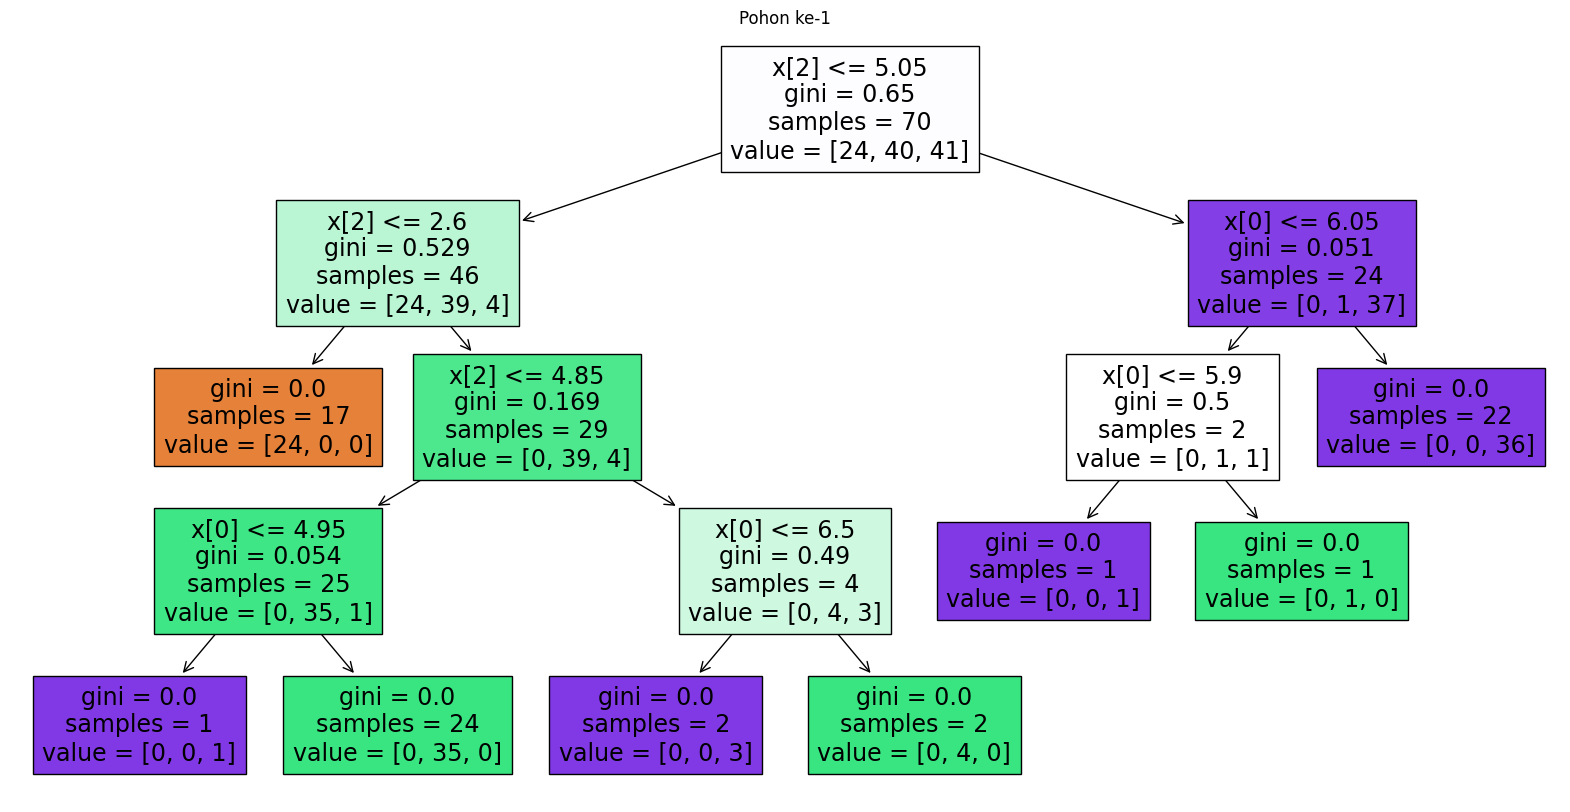

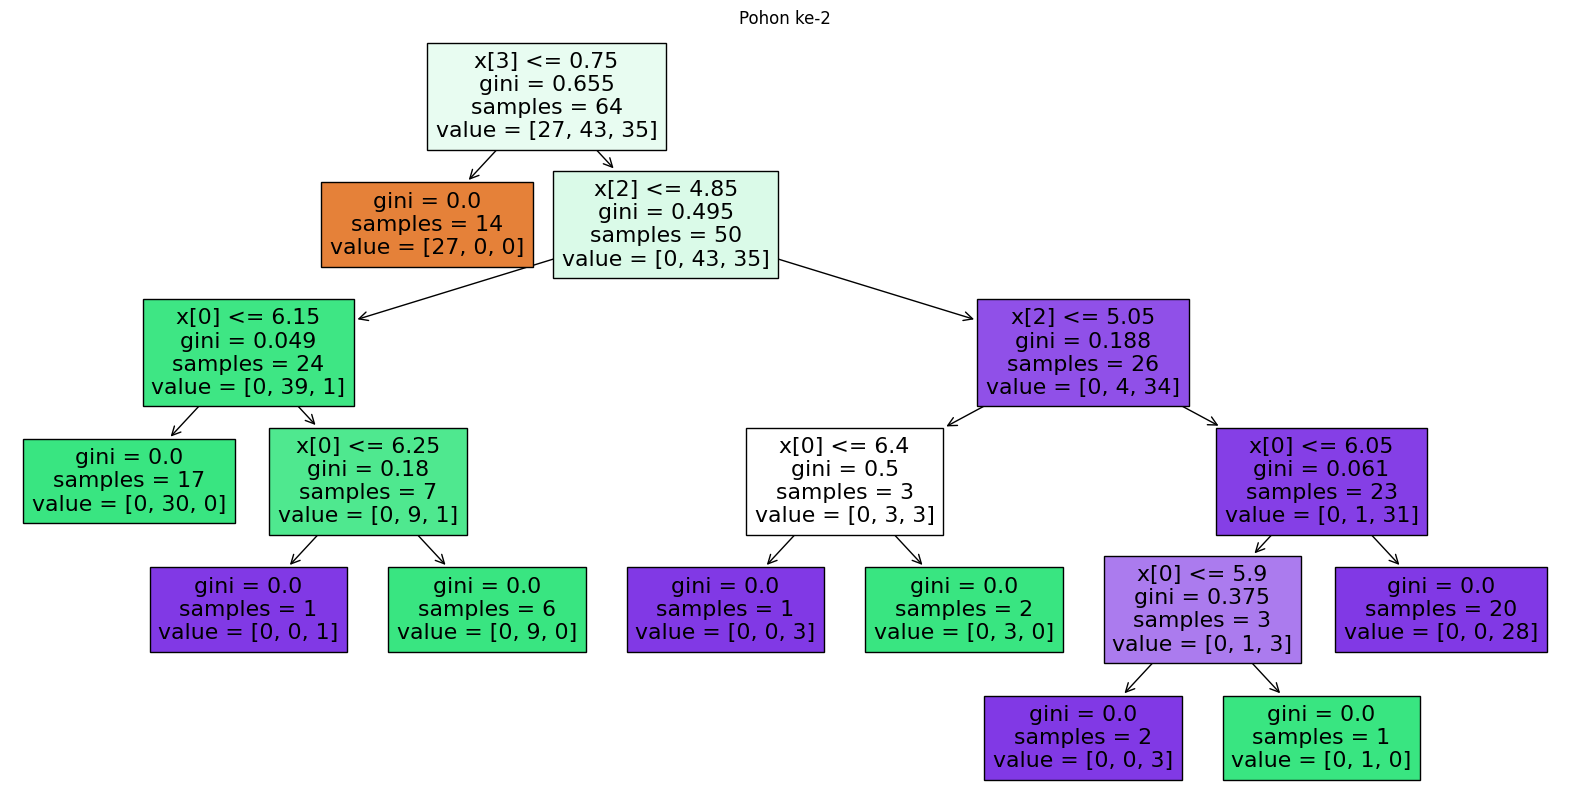

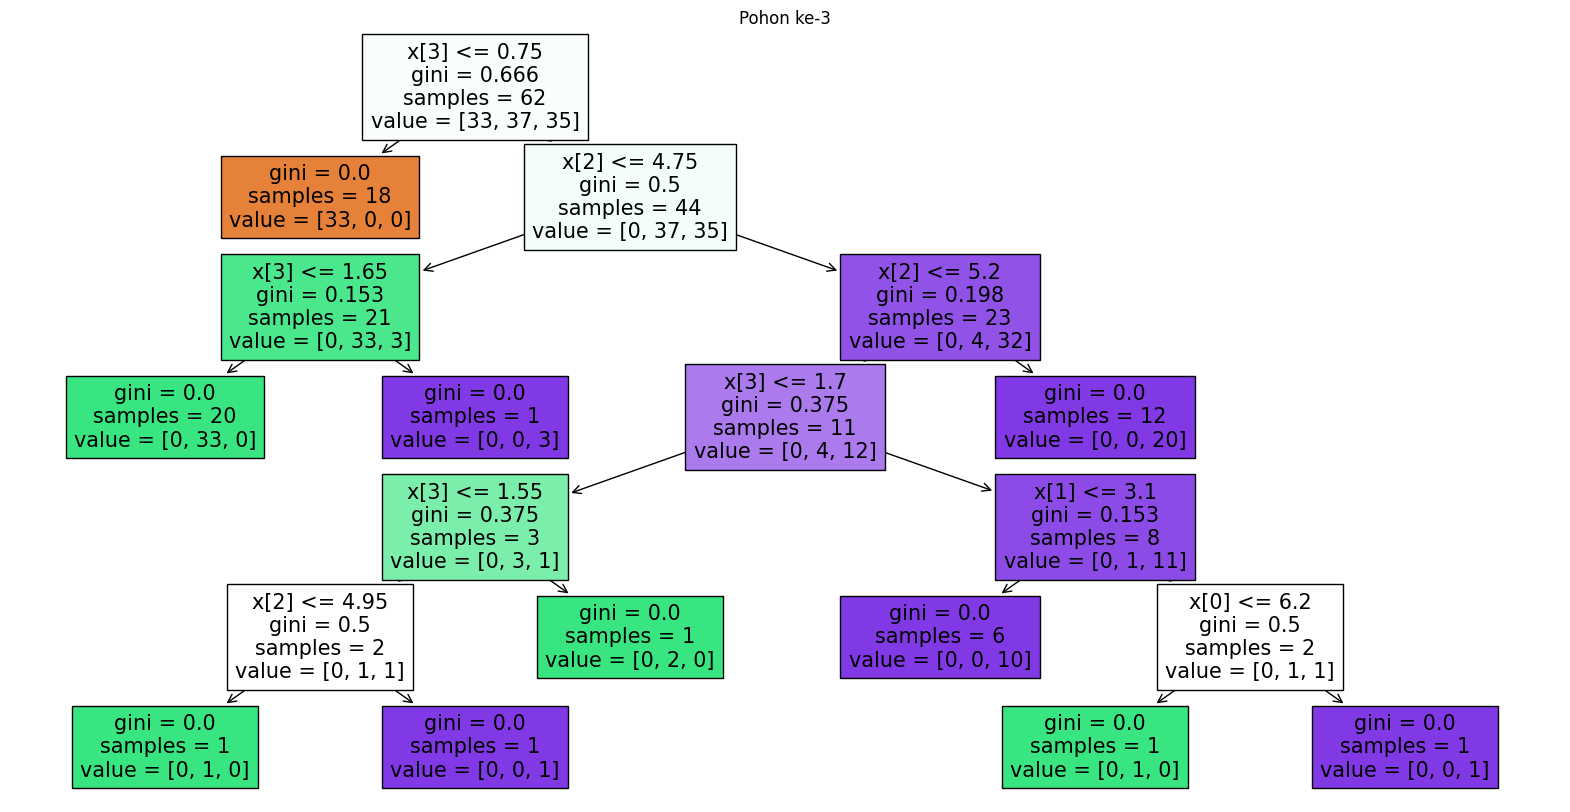

In [104]:
for i, tree in enumerate(model.estimators_[0:3]):
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True)
    plt.title(f"Pohon ke-{i+1}")
    plt.show()

## Prediction Class

Setelah itu kita dapat mencoba model yang telah kita buat sebelumnya untuk memprediksi spesies dari sebuah bunga iris. Kita perlu mengingat atribut yang menjadi masukan dari model yaitu sepal length, sepal width, petal length, dan petal width. Kita akan memasukan data yang sesuai dengan format tersebut secara berurutan dalam satuan centimenter. Misalkan kita ingin memprediksi spesies dari bungan iris yang memiliki:
```
1. sepal length 6.1 cm
2. sepal width 3.2 cm
3. petal length 5.7 cm
4. petal width 2.9 cm
```

In [95]:
print(model.predict([[6.1, 3.2, 5.7, 2.9]])[0])

2


## Hasil

Hasil prediksi mengembalikan nilai 2 yang menandakan spesies Iris yang diprediksi adalah Iris-virginica. Coba input data ini ke dalam model yang sudah kita buat dan tuliskan hasilnya di kolom komentar ya!
sepal length 6.1 cm, sepal width 3.2 cm, petal length 5.7 cm dan petal width 2.9 cm

## Kesimpulan

Model Random Forest menggunakan banyak pohon kecil yang dipakai secara paralel, dan hasil prediksinya ditentukan oleh mayoritas hasil prediksi dari pohon-pohon tersebut. Karena itu, model ini sering kali lebih tepat dibandingkan model machine learning lainnya. Namun, model ini juga lebih lambat dibandingkan model lainnya karena harus melakukan prediksi secara terpisah pada setiap pohon.